<a href="https://colab.research.google.com/github/AfnShafei/gdp-dashboard/blob/main/CNN_GTSRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow
!pip install keras
!pip install kaggle


In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"afnanalabbas","key":"743f1fb5518d082236f3386f3a5e982d"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 96% 590M/612M [00:02<00:00, 272MB/s]
100% 612M/612M [00:02<00:00, 244MB/s]


In [6]:
!unzip gtsrb-german-traffic-sign.zip -d GTSRB


Streaming output truncated to the last 5000 lines.
  inflating: GTSRB/train/5/00005_00053_00010.png  
  inflating: GTSRB/train/5/00005_00053_00011.png  
  inflating: GTSRB/train/5/00005_00053_00012.png  
  inflating: GTSRB/train/5/00005_00053_00013.png  
  inflating: GTSRB/train/5/00005_00053_00014.png  
  inflating: GTSRB/train/5/00005_00053_00015.png  
  inflating: GTSRB/train/5/00005_00053_00016.png  
  inflating: GTSRB/train/5/00005_00053_00017.png  
  inflating: GTSRB/train/5/00005_00053_00018.png  
  inflating: GTSRB/train/5/00005_00053_00019.png  
  inflating: GTSRB/train/5/00005_00053_00020.png  
  inflating: GTSRB/train/5/00005_00053_00021.png  
  inflating: GTSRB/train/5/00005_00053_00022.png  
  inflating: GTSRB/train/5/00005_00053_00023.png  
  inflating: GTSRB/train/5/00005_00053_00024.png  
  inflating: GTSRB/train/5/00005_00053_00025.png  
  inflating: GTSRB/train/5/00005_00053_00026.png  
  inflating: GTSRB/train/5/00005_00053_00027.png  
  inflating: GTSRB/train/5/0000

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical


In [8]:
def load_data(data_path):
    images = []
    labels = []

    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):
            label = int(folder)  # Assuming folder names are labels
            for image_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, image_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (32, 32))  # Resize to 32x32
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

data_path = 'GTSRB/Train'
images, labels = load_data(data_path)

# Normalize the images
images = images.astype('float32') / 255.0
labels = to_categorical(labels, num_classes=43)  # Assuming 43 classes


In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))  # Adjust to number of classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.5791 - loss: 1.4078 - val_accuracy: 0.9251 - val_loss: 0.3008
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.8797 - loss: 0.3837 - val_accuracy: 0.9685 - val_loss: 0.1165
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 92s 53ms/step - accuracy: 0.9374 - loss: 0.2008 - val_accuracy: 0.9805 - val_loss: 0.0730
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.9575 - loss: 0.1446 - val_accuracy: 0.9860 - val_loss: 0.0502
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.9713 - loss: 0.1001 - val_accuracy: 0.9801 - val_loss: 0.0676
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.9726 - loss: 0.0867 - val_accuracy: 0.9892 - val_loss: 0.0466
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9780 - loss: 0.0805 - val_accuracy: 0.9880 - val_loss: 0.0458
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9809 - loss: 0.0572 - 

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9964 - loss: 0.0156
Test Loss: 0.0245, Test Accuracy: 0.9955


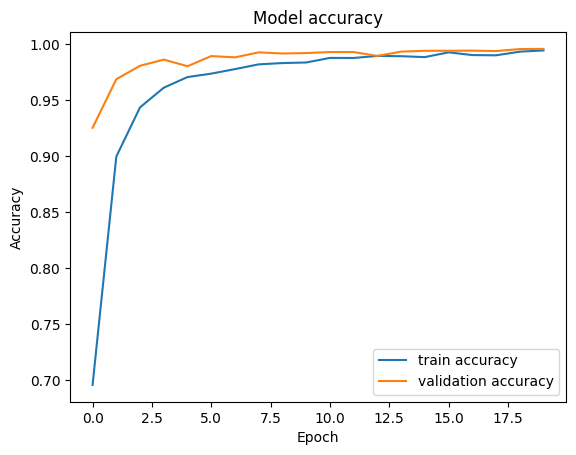

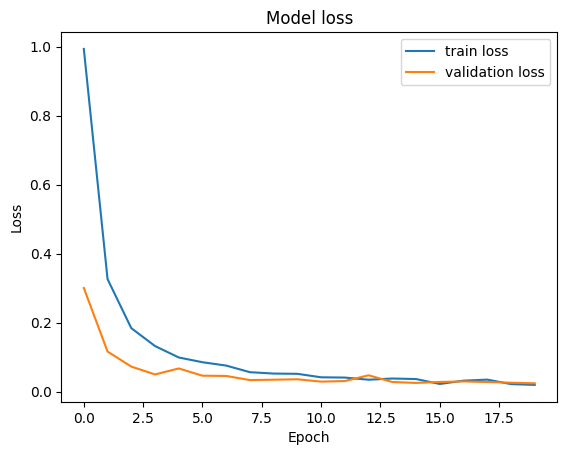

In [17]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [18]:
model.save('CNN-GTSRD.h5')


In [19]:
!pip install tensorflow keras streamlit opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00


In [29]:
!pip install streamlit -q

In [35]:
!npm install -g localtunnel


added 22 packages, and audited 23 packages in 1s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [30]:
!wget -q -o ipv4.icanhazip.com

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [36]:
%%writefile app.py
import streamlit as st
import numpy as np
import cv2
from keras.models import load_model
import tempfile
import os

# Load the trained model
model = load_model('traffic_sign_model.h5')

# Define class names for the traffic signs
class_names = ['Speed Limit (20km/h)', 'Speed Limit (30km/h)', 'Speed Limit (50km/h)',
               'Speed Limit (60km/h)', 'Speed Limit (70km/h)', 'Speed Limit (80km/h)',
               'End of Speed Limit (80km/h)', 'Speed Limit (100km/h)', 'Speed Limit (120km/h)',
               'No Passing', 'No Passing for Vehicles over 3.5 tons',
               'Right-of-Way at Intersection', 'Priority Road', 'Yield', 'Stop',
               'No Entry', 'General Caution', 'Dangerous Curve to the Left',
               'Dangerous Curve to the Right', 'Double Curve', 'Bumpy Road',
               'Slippery Road', 'Road Narrows on the Right', 'Road Work',
               'Traffic Signals', 'Pedestrians', 'Children Crossing', 'Bicycles Crossing',
               'Beware of Animals', 'End of All Speed and Passing Limits',
               'Turn Right Ahead', 'Turn Left Ahead', 'Ahead Only',
               'Go Straight or Right', 'Go Straight or Left',
               'Keep Right', 'Keep Left', 'Roundabout Mandatory',
               'End of Roundabout Mandatory', '2-Way Traffic', 'Traffic Flow Regulation',
               'No Parking', 'No Stopping', 'Disabled Parking', 'End of All Restrictions']

st.title('Traffic Sign Recognition from Video')
st.write('Upload a video file to get predictions.')

# Upload the video
uploaded_file = st.file_uploader("Choose a video...", type=["mp4", "avi", "mov"])

if uploaded_file is not None:
    # Create a temporary file
    tfile = tempfile.NamedTemporaryFile(delete=False)
    tfile.write(uploaded_file.read())
    video_path = tfile.name

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Create a VideoWriter object to save the output video
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Resize the frame to the size expected by the model
        resized_frame = cv2.resize(frame, (32, 32))
        normalized_frame = resized_frame.astype('float32') / 255.0
        reshaped_frame = np.reshape(normalized_frame, (1, 32, 32, 3))

        # Make prediction
        prediction = model.predict(reshaped_frame)
        predicted_class = np.argmax(prediction)

        # Display the predicted class on the frame
        cv2.putText(frame, f'Predicted: {class_names[predicted_class]}', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Write the frame with the prediction to the output video
        out.write(frame)

        # Display the output video in the Streamlit app
        st.image(frame, channels="BGR", use_column_width=True)

    # Release the video capture and writer
    cap.release()
    out.release()
    os.remove(video_path)

    st.success('Video processed and predictions made!')


Overwriting app.py


In [37]:
!streamlit run app.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.230.185.232:8501

your url is: https://ready-doors-care.loca.lt
  Stopping...
^C
